# How to Handle Outliers

When you come across outliers, you will need to make a decision about what to do with them. You can always run your regression analysis with and without them to compare and contrast the results. Depending on the size of your sample, you may need to make some hard decisions.  If you have big data, you probably will not have to wrestle with this issue as you can throw out outliers easily.  Whatever decision you make, make sure that you are explicit about how you handled your outliers. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Example warehouse data set
rate = pd.read_csv('make_rate.csv')
rate.head()

,products,process,months,rate
0,700,18,5,1
1,600,34,4,0
2,200,18,2,0
3,600,12,3,0
4,263,60,4,0


In [3]:
# Min value products
rate['products'].min()

100

In [4]:
# Max value products
rate['products'].max()

2450

In [5]:
# Create extreme new values

rate.iloc[0,0]=4000
rate.iloc[3,0]=5000
rate.iloc[3,3]=1 # For sure, this worker is successful in making rate

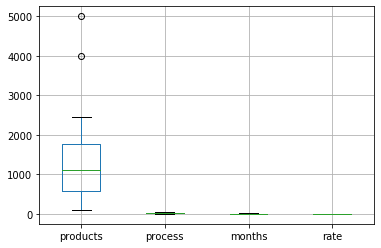

In [7]:
# Let's see the outliers
rate.boxplot()

### Drop Outliers

Say we have a couple of extreme outliers, say 4000 in the products column at row 0 and 5000 in row 3.

In [8]:
rate.head()

,products,process,months,rate
0,4000,18,5,1
1,600,34,4,0
2,200,18,2,0
3,5000,12,3,1
4,263,60,4,0


In [9]:
# Set a threshold to drop these observations
# Subset out the dataframe, like a filter
# rows 0 and 3 have dropped out (contained outliers)
rate[rate['products'] < 3000]

,products,process,months,rate
1,600,34,4,0
2,200,18,2,0
4,263,60,4,0
5,500,9,10,1
6,1300,10,5,1
...,...,...,...,...
95,1000,40,5,0
96,2100,10,11,1
97,500,35,1,0
98,1300,25,4,0


### Flag Outliers

In [10]:
# Create an extreme new value
# old value row 0 is 700
rate.iloc[0,0]=4000
rate.iloc[3,0]=5000
rate.iloc[3,3]=1 # For sure, this worker is successful in making rate

In [11]:
# Let's take a look at our outlier
rate.head()

,products,process,months,rate
0,4000,18,5,1
1,600,34,4,0
2,200,18,2,0
3,5000,12,3,1
4,263,60,4,0


In [12]:
# Outlier will be marked as 1 in a new column called outliers
# Threshold is set at 3000
# Under 3000, data point is recoded as 0, otherwise 1
rate['outliers_products'] = np.where(rate['products'] < 3000, 0, 1)

In [13]:
# Check to see new column flags where outlier is located
rate.head()

,products,process,months,rate,outliers_products
0,4000,18,5,1,1
1,600,34,4,0,0
2,200,18,2,0,0
3,5000,12,3,1,1
4,263,60,4,0,0


In [14]:
# Take a look at the frequency counts of outliers
rate['outliers_products'].value_counts()

0    98
1     2
Name: outliers_products, dtype: int64

### Perform a Rescale Transformation

In [15]:
# Next, an approach is to retain the outliers and
#to transform it along with the rest of the data in the column.
rate.head()

,products,process,months,rate,outliers_products
0,4000,18,5,1,1
1,600,34,4,0,0
2,200,18,2,0,0
3,5000,12,3,1,1
4,263,60,4,0,0


In [16]:
# Log transformation
rate['log_of_products'] = [np.log(x) for x in rate['products']]

In [17]:
rate.head()

,products,process,months,rate,outliers_products,log_of_products
0,4000,18,5,1,1,8.294050
1,600,34,4,0,0,6.396930
2,200,18,2,0,0,5.298317
3,5000,12,3,1,1,8.517193
4,263,60,4,0,0,5.572154


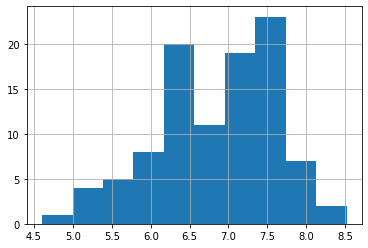

In [18]:
# Take a look at the rescaled distribution
import matplotlib.pyplot as plt
rate['log_of_products'].hist()
plt.show();

# 8.5 is the largest value on the x-scale
# Frequency counts are on the y-axis

In [ ]:
# end